In [83]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

%load_ext ipydex.displaytools
%matplotlib inline

plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath}' # für \text{..}
plt.rcParams['text.usetex'] = True

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


Gegeben:

![](V2.4_fig3.png)



Gesucht:

- $u_B(R)$

Hinweis: der Übertrager und die Erdung des Punktes zwischen den beiden $R_1$ Widerständen ist nur für die Messung notwendig (Masse als Bezugspunkt), aber nicht für die Rechnung. Daher wird für die Rechnung der Knoten **B** als Masse ganz definiert. Der Anschluss von Kanal 2 sei Knoten **C**.


Ansatz:

$$
u_B = u_{C\rightarrow B} - \frac{u_q}{2}
$$


Rechnung:



## b) Ortskurven-Schar $|Z (\omega, R_2)|$

In [23]:

omega, R1, R, C = sp.symbols("omega, R1, R, C", real=True)

Zc = 1/(1j*omega*C)


Z = sp.simplify(R + Zc) ##:

# auf u_q normierte Brückenspannung
u_B_norm = sp.simplify(Zc/Z - 0.5) ##:

sp.arg(u_B_norm) ##:


Z := R - 1.0*I/(C*omega)

---

u_B_norm := 0.5*(-C*R*omega - I)/(C*R*omega - I)

---

(sp.arg(u_B_norm)) := arg(-(C*R*omega + I)/(C*R*omega - I))

---

In [17]:
arg_func(100e6)

-3.1414108354084758

In [18]:
rplmts = [(R1, 1e3), (C, 0.22e-6),(omega, 500*2*np.pi)]

arg_num = sp.arg(u_B_norm).subs(rplmts) ##:
arg_func = sp.lambdify((R,), arg_num, modules="numpy")

arg_num := arg(-(0.000691150383789755*R + I)/(0.000691150383789755*R - I))

---

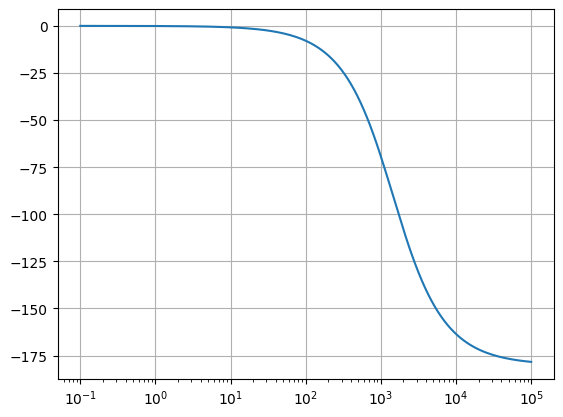

In [24]:
rr2 = np.logspace(-1, 5, 141)

aa = arg_func(rr2)/np.pi*180
plt.semilogx(rr2, aa)
plt.grid()


$R^*$ für 90° Phasendrehung ausrechnen

In [31]:
R_star, = sp.solve(arg_num + sp.pi/2, R) ##:

R_star := 1446.86311901723

---

Probe 1:

In [34]:
u_re, u_im = u_B_norm.subs(rplmts).as_real_imag()

In [38]:
sp.atan(u_im/u_re).subs(R, R_star)/np.pi

-0.500000000000000

Probe 2 (Realteil = 0):

In [40]:
u_re ##:
u_im ##:

(u_re) := -2.38844426506362e-7*R**2/(4.77688853012725e-7*R**2 + 1) + 0.5/(4.77688853012725e-7*R**2 + 1)

---

(u_im) := -0.000691150383789755*R/(4.77688853012725e-7*R**2 + 1)

---

In [41]:
u_re.subs(R, R_star)

3.33066907387547e-16

## 2. Brückenschaltung

Gegeben:

![](V2.4_fig4.png)



In [51]:
omega, R1, R2, R, C = sp.symbols("omega, R1, R2, R, C", real=True)
rplmts = [(R1, 2e3), (R2, 1e3), (C, 0.22e-6), (omega, 500*2*np.pi)]

Z1 = R + 1/(1j*omega*C)
Z2 = R*1/(1j*omega*C)/(R + 1/(1j*omega*C))

# 2 Varianten der Berechnung (jeweils auf uq normiert)
ub1 =  sp.simplify(sp.sympify(2)/3 - Z1/(Z1+Z2)) ##:
ub2 =  sp.simplify(Z2/(Z1+Z2) - sp.sympify(1)/3) ##:

ub1 := 1.0*(C**2*R**2*omega**2 - 1)/(-3.0*C**2*R**2*omega**2 + 9.0*I*C*R*omega + 3.0)

---

ub2 := 1.0*(C**2*R**2*omega**2 - 1)/(-3.0*C**2*R**2*omega**2 + 9.0*I*C*R*omega + 3.0)

---

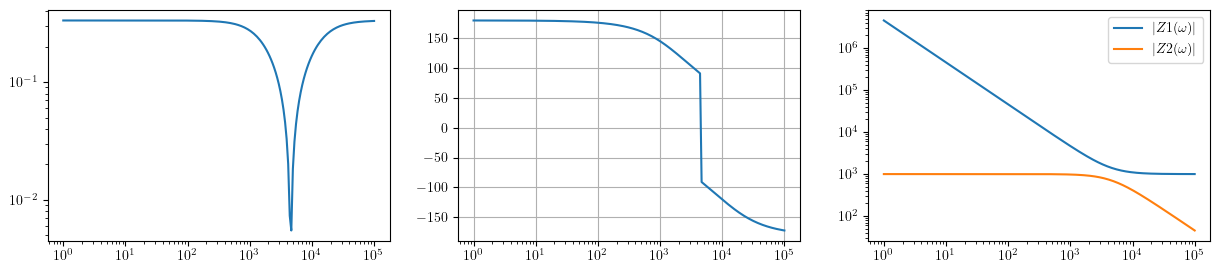

In [85]:
u_func = sp.lambdify(omega, ub1.subs(rplmts[:-1]+[(R, 1e3)]), modules="numpy")
z1_func = sp.lambdify(omega, Z1.subs(rplmts[:-1]+[(R, 1e3)]), modules="numpy")
z2_func = sp.lambdify(omega, Z2.subs(rplmts[:-1]+[(R, 1e3)]), modules="numpy")
ww = np.logspace(0, 5, 200)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.loglog(ww, np.abs(u_func(ww)))
ax2.semilogx(ww, np.angle(u_func(ww))/np.pi*180)
ax2.grid()

zz1 = z1_func(ww)
zz2 = z2_func(ww)
# ax3.set_aspect("equal")
# ax3.plot(np.real(zz1), np.imag(zz1), label="Z1")
# ax3.plot(np.real(zz2), np.imag(zz2), label="Z2")
ax3.loglog(ww, np.abs(zz1), label=r"$|Z1(\omega)|$")
ax3.loglog(ww, np.abs(zz2), label=r"$|Z2(\omega)|$")
ax3.legend()
         
         
         

In [72]:
Z2

-1.0*I*R/(C*omega*(R - 1.0*I/(C*omega)))